## FINANCIAL ANALYSIS VOLUNTEERING PROJECT
### FELIX IDOWU
---

### OBJECTIVES
#### Your task is to combine and analyze the two datasets to answer the following questions:
1. #### Customer Demographics: What is the age distribution, gender ratio, and income distribution of the customers?
2. #### Credit Card Ownership: How many credit cards does the average user have? Identify customers with multiple credit cards.
3. #### Credit Risk Analysis: Identify customers with high total debt compared to their yearly income.
4. #### Insights for Marketing: Provide insights on which group of customers might be ideal for targeted marketing campaigns (based on credit scores, income, and card types).
---

### DATASET
##### There are two datasets for this project [User_data](https://docs.google.com/spreadsheets/d/1baYcMQr-KCb9FwrY31mQC5ya8FblMHbY/edit?usp=sharing&ouid=102538990223331200198&rtpof=true&sd=true) and [Card_data](https://docs.google.com/spreadsheets/d/1azUzYFNynwX3KcyOT1sCXYD3BVz36eBd/edit?usp=sharing&ouid=102538990223331200198&rtpof=true&sd=true) Click the blue text to view Dataset

#### Users_data: 
##### This contains demographic and financial information about the users.
  ##### Columns:
* ##### main_id: Unique user identifier (foreign key for client_id in cards_data)
* ##### current_age, retirement_age
* ##### gender
* ##### address, latitude, longitude
* ##### per_capita_income, yearly_income, total_debt, credit_score
* ##### num_credit_cards: Number of credit cards the user owns

#### Cards_data:
##### Contains details about each credit card associated with a user.
##### Columns:
* ##### card_id: Unique identifier for each card
* ##### client_id: Foreign key linked to main_id in users_data
* ##### card_brand, card_type (e.g., Debit, Credit, Prepaid)
* ##### expires, acct_open_date
* ##### credit_limit, year_pin_last_changed
---

### Importing libraries needed


In [168]:
import pandas as pd
import matplotlib.pyplot as plt

In [169]:
#importing dataset

# pd.set_option('display.max_columns', None)  
user=pd.read_excel('users_data.xlsx', sheet_name='users_data')
card=pd.read_excel('cards_data.xlsx',sheet_name='cards_data')


### Data Preparation

In [170]:
user.columns

Index(['main_id', 'current_age', 'retirement_age', 'birth_year', 'birth_month',
       'gender', 'address', 'latitude', 'longitude', 'per_capita_income',
       'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards'],
      dtype='object')

In [171]:
card.columns

Index(['card_id', 'client_id', 'card_brand', 'card_type', 'card_number',
       'expires', 'cvv', 'has_chip', 'num_cards_issued', 'credit_limit',
       'acct_open_date', 'year_pin_last_changed'],
      dtype='object')

In [172]:
#Checking for duplicates in the primary key 
print(card.card_id.duplicated().sum(),',',user.main_id.duplicated().sum())

0 , 0


##### Merging data

In [173]:
df=pd.merge(user,card, left_on='main_id', right_on='client_id', how='inner')

In [7]:
df

,main_id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,...,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278,...,Visa,Debit,4344676511950440,2022-12-01,623,YES,2,24295,2002-09-01,2008
1,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278,...,Visa,Debit,4956965974959980,2020-12-01,393,YES,2,21968,2014-04-01,2014
2,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278,...,Visa,Debit,4582313478255490,2024-02-01,719,YES,2,46414,2003-07-01,2004
3,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278,...,Visa,Credit,4879494103069050,2024-08-01,693,NO,1,12400,2003-01-01,2012
4,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278,...,Mastercard,Debit (Prepaid),5722874738736010,2009-03-01,75,YES,1,28,2008-09-01,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,185,47,67,1973,1,Female,276 Fifth Boulevard,40.66,-74.19,15175,...,Amex,Credit,300609782832003,2024-01-01,663,YES,1,6900,2000-11-01,2013
6142,185,47,67,1973,1,Female,276 Fifth Boulevard,40.66,-74.19,15175,...,Visa,Credit,4718517475996010,2021-01-01,492,YES,2,5700,2012-04-01,2012
6143,1007,66,60,1954,2,Male,259 Valley Boulevard,40.24,-76.92,25336,...,Mastercard,Credit,5929512204765910,2020-08-01,237,NO,2,9200,2012-02-01,2012
6144,1110,21,60,1998,11,Female,472 Ocean View Street,42.86,-71.48,32325,...,Mastercard,Debit,5589768928167460,2020-01-01,630,YES,1,28074,2020-01-01,2020


### Data Cleaning

In [174]:
#Checking for duplicated values
print(df.duplicated().sum(), ',',df.card_id.duplicated().sum())

0 , 0


From here we can see that the primary key in this dataset is the card_id

In [175]:
#Checking for null values
df.isna().sum()

main_id                  0
current_age              0
retirement_age           0
birth_year               0
birth_month              0
gender                   0
address                  0
latitude                 0
longitude                0
per_capita_income        0
yearly_income            0
total_debt               0
credit_score             0
num_credit_cards         0
card_id                  0
client_id                0
card_brand               0
card_type                0
card_number              0
expires                  0
cvv                      0
has_chip                 0
num_cards_issued         0
credit_limit             0
acct_open_date           0
year_pin_last_changed    0
dtype: int64

In [176]:
df[df.yearly_income<1000].yearly_income.sort_values()

2288      1
2286      1
2287      1
5212      2
5211      2
5210      2
5209      2
5207      2
5208      2
4145      3
4146      3
4771      4
4773      4
4772      4
5343    399
5344    399
5345    399
1978    553
1980    553
1979    553
4410    645
4412    645
4411    645
2245    920
2244    920
2243    920
Name: yearly_income, dtype: int64

In [177]:
# Eliminating unrealistic Yearly_income
df=df[df.yearly_income>399]

#### Gender Ratio

In [178]:
male=df[df.gender == 'Male'].reset_index()

In [179]:
male=male.drop(columns='index')

In [180]:
male

,main_id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,...,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed
0,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,53797,...,Mastercard,Debit,5905027855347650,2022-01-01,886,YES,1,34900,1999-12-01,2012
1,68,42,70,1977,10,Male,58 Birch Lane,41.55,-90.60,20599,...,Visa,Credit,4099623033306950,2021-09-01,74,YES,2,9900,2002-01-01,2019
2,68,42,70,1977,10,Male,58 Birch Lane,41.55,-90.60,20599,...,Visa,Debit,4281200324251210,2013-07-01,865,YES,2,21587,2007-09-01,2007
3,68,42,70,1977,10,Male,58 Birch Lane,41.55,-90.60,20599,...,Visa,Credit,4411456925570760,2022-11-01,922,YES,2,15800,2005-11-01,2011
4,1711,26,67,1993,12,Male,1941 Ninth Street,45.51,-122.64,26790,...,Visa,Debit,4595831603224640,2023-05-01,689,NO,2,17480,2020-01-01,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,588,21,66,1998,6,Male,2183 Catherine Boulevard,38.47,-90.75,23106,...,Mastercard,Debit,5800888888822200,2020-02-01,80,YES,1,26265,2020-02-01,2020
2992,986,32,70,1987,7,Male,6577 Lexington Lane,40.65,-73.58,23550,...,Visa,Debit,4351221158003580,2012-08-01,302,YES,2,27317,2010-01-01,2010
2993,986,32,70,1987,7,Male,6577 Lexington Lane,40.65,-73.58,23550,...,Visa,Debit,4947422352493090,2023-01-01,940,YES,2,15094,2009-09-01,2011
2994,986,32,70,1987,7,Male,6577 Lexington Lane,40.65,-73.58,23550,...,Discover,Credit,6537516721853180,2023-02-01,573,NO,1,18300,2007-03-01,2013


In [181]:
male.shape

(2996, 26)

In [182]:
female=df[df.gender == 'Female'].reset_index()


In [183]:
female=female.drop(columns='index')

In [184]:
female.shape

(3133, 26)

#### Male to Female ratio =  2996 : 3133  

### Age Distribution

In [185]:
ages=df[['client_id','current_age']]
ages
## Extracting the needed column

,client_id,current_age
0,825,53
1,825,53
2,825,53
3,825,53
4,825,53
...,...,...
6141,185,47
6142,185,47
6143,1007,66
6144,1110,21


In [186]:
ages.duplicated().sum()

4134

#### Since we are dealing with customer detail and not card details, we have to remove duplicated with respect to a unique customer detail

In [187]:
ages=ages.drop_duplicates()

In [188]:
ages.sort_values('current_age')
ages

,client_id,current_age
0,825,53
5,1746,53
10,1718,81
15,708,63
19,1164,43
...,...,...
6133,986,32
6136,1944,62
6140,185,47
6143,1007,66


In [189]:
print('Age Range :',ages.current_age.min(),'-',ages.current_age.max())

Age Range : 18 - 101


#### Segmenting Customer's Age

In [211]:
def age(dist):
    if dist >=18 and dist <= 25:
        return 'Young Adults'
    elif dist >=26 and dist<= 35: 
        return 'Early Career Professionals'
    elif dist >=36 and dist<=50:
        return 'Mid-Career Individuals'
    elif dist >=51 and dist<=65:
        return 'Late Career & Pre-Retirement'
    elif dist >=66 and dist<=80:
        return 'Retirees'
    else:
        return 'Elderly'

In [190]:
df['age_segment']= df.current_age.apply(age)

In [192]:
df.head(3)

,main_id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,...,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,age_segment
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278,...,Debit,4344676511950440,2022-12-01,623,YES,2,24295,2002-09-01,2008,Late Career & Pre-Retirement
1,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278,...,Debit,4956965974959980,2020-12-01,393,YES,2,21968,2014-04-01,2014,Late Career & Pre-Retirement
2,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278,...,Debit,4582313478255490,2024-02-01,719,YES,2,46414,2003-07-01,2004,Late Career & Pre-Retirement


In [200]:
age_segment=df.age_segment.value_counts().reset_index()
age_segment

,index,age_segment
0,Mid-Career Individuals,1668
1,Late Career & Pre-Retirement,1624
2,Early Career Professionals,859
3,Retirees,784
4,Young Adults,691
5,Elderly,503


In [206]:
# Renaming the columns
age_segment=age_segment.rename(columns={'age_segment':'counts'})
age_segment=age_segment.rename(columns={'index':'age_segment'})
age_segment

,counts,counts
0,Mid-Career Individuals,1668
1,Late Career & Pre-Retirement,1624
2,Early Career Professionals,859
3,Retirees,784
4,Young Adults,691
5,Elderly,503


<function matplotlib.pyplot.show(close=None, block=None)>

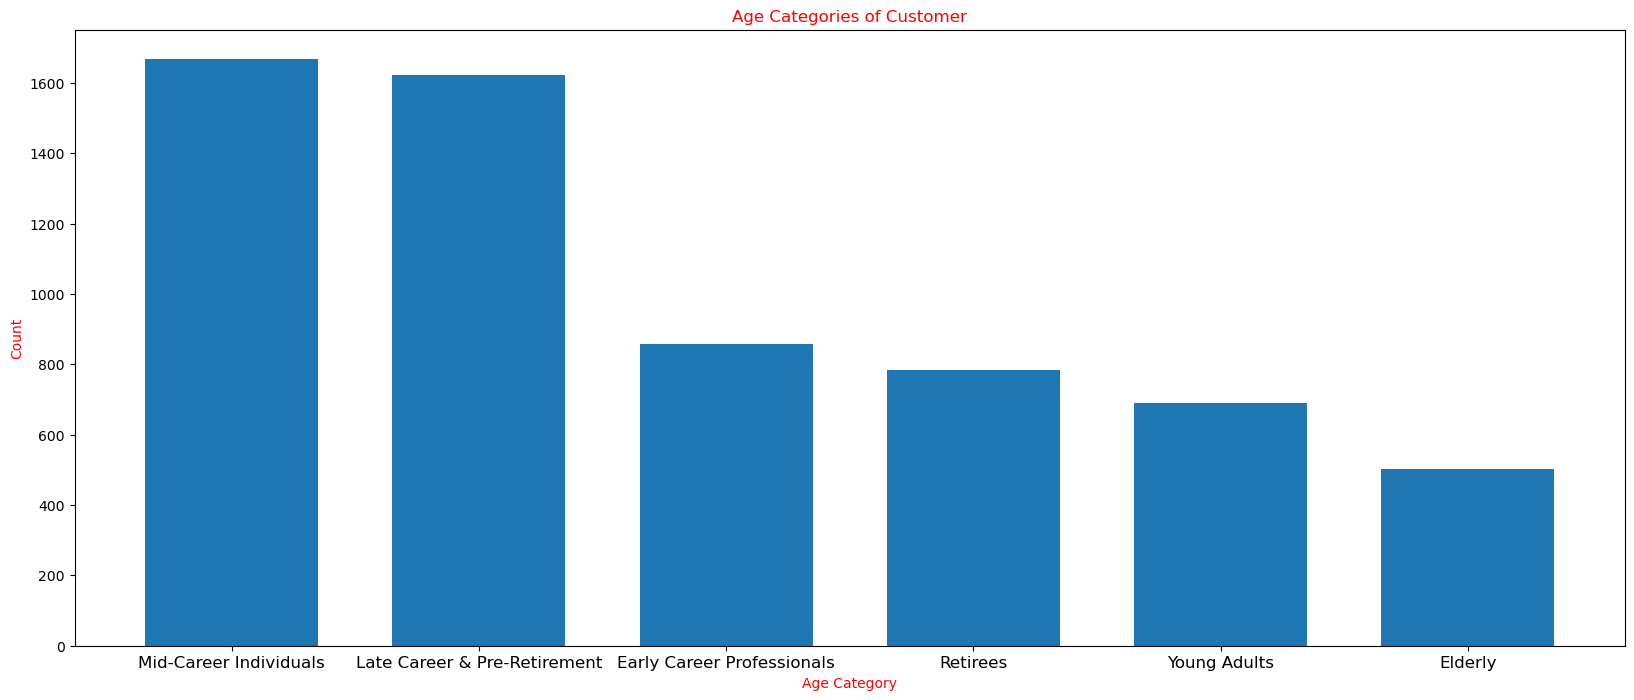

In [205]:
plt.figure(figsize=(20,8))
plt.bar(age_segment.age_segment,age_segment['counts'], width=0.7)
plt.xticks(fontsize=12)
plt.title('Age Categories of Customer', color='r')
plt.xlabel('Age Category', color='red')
plt.ylabel('Count', color='red')
plt.show

#### Extracting the count of Each unique age of customers

In [207]:
age_count = ages.pivot_table(index="current_age", values="client_id", aggfunc="count")
age_count

,client_id
current_age,
18,77
19,34
20,40
21,40
22,43
...,...
93,1
94,2
98,2


In [208]:
age_count.rename(columns={'client_id':'count'}, inplace=True)

In [209]:
age_count=pivot_1.reset_index()
age_count.sort_values('count', ascending= False)

,current_age,count
0,18,77
29,47,46
31,49,44
32,50,43
4,22,43
...,...,...
76,94,2
77,98,2
75,93,1
78,99,1


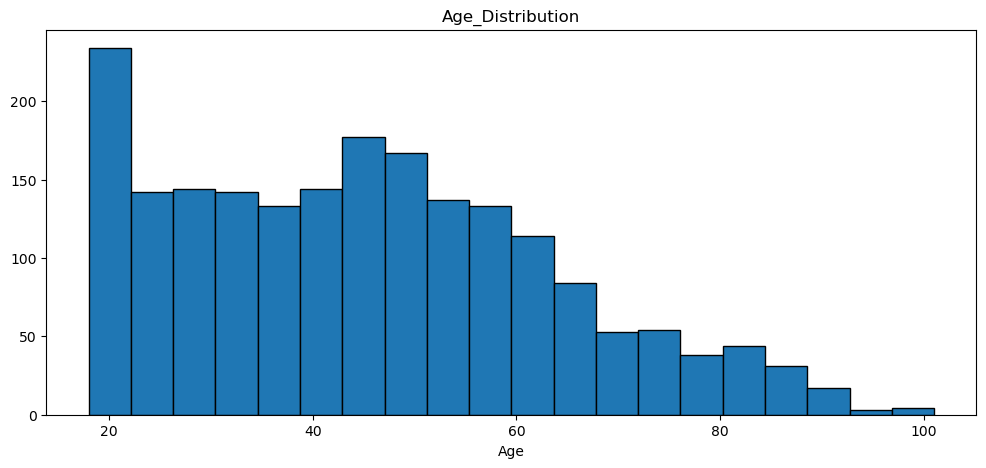

In [210]:
plt.figure(figsize=(12,5))
plt.hist(age_count.current_age,weights=age_count['count'], bins=20, edgecolor='black')
plt.title('Age_Distribution')
plt.xlabel('Age')
plt.show()

### Income Distribution

#### Segmenting the Customer Yearly_Income

In [250]:
def income(customers):
    if customers <= 50000:
        return 'Low_Income_Customer'
    elif customers  >=100000:
        return 'High_Income_Customer'
    else:
        return 'Mid-range_Income_Customer'
        

In [251]:
df['Income_Category']= df.yearly_income.apply(income)

In [252]:
income_segment=df.Income_Category.value_counts().reset_index()
income_segment=income_segment.rename(columns={'Income_Category':'counts'})
income_segment=income_segment.rename(columns={'index':'Income_Category'})
income_segment

,Income_Category,counts
0,Low_Income_Customer,4326
1,Mid-range_Income_Customer,1649
2,High_Income_Customer,154


##### Pivoting The Credit_Score_Category and the Income_category

In [253]:
def credit(score):
    if score >= 740:
        return 'Good credit score'
    elif score >= 540:
        return 'Fair credit score'
    else:  
        return 'Bad credit score' 


In [254]:
df['Credit_Score_Category']= df.credit_score.apply(credit)

In [255]:
pivot=df.pivot_table(index='Credit_Score_Category',columns='Income_Category', values='main_id', aggfunc='count')
pivot

Income_Category,High_Income_Customer,Low_Income_Customer,Mid-range_Income_Customer
Credit_Score_Category,,,
Bad credit score,1,57,19
Fair credit score,93,2740,1053
Good credit score,60,1529,577


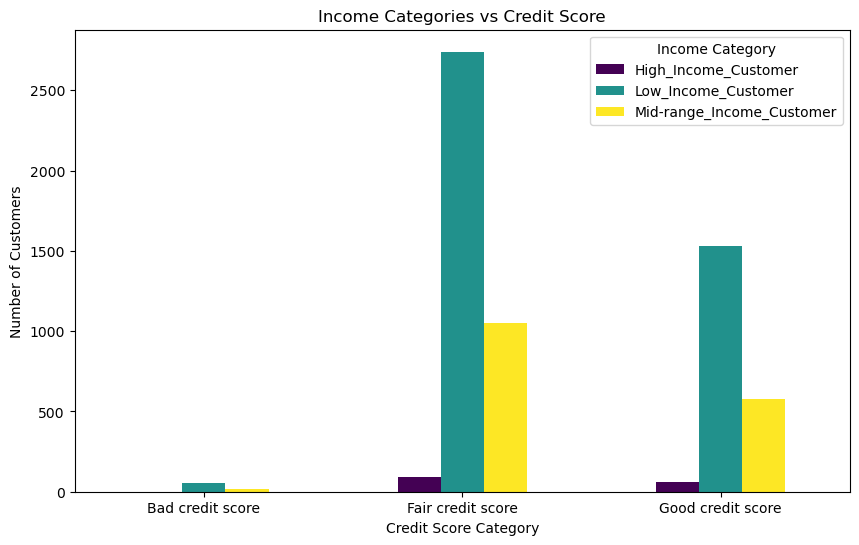

In [266]:
pivot.plot(kind='bar', figsize=(10,6), colormap='viridis')

plt.title("Income Categories vs Credit Score")
plt.xlabel("Credit Score Category")
plt.ylabel("Number of Customers")
plt.legend(title="Income Category")
plt.xticks(rotation=0)
plt.show()


### Credit Risk Analysis

In [258]:
debt=df[['total_debt','yearly_income']]
debt=debt.drop_duplicates().sort_values('total_debt', ascending=False)
debt

,total_debt,yearly_income
5572,516263,307018
5492,461854,185909
1599,448929,189490
246,437533,196784
2229,328089,114318
...,...,...
1955,0,46810
5131,0,45973
5925,0,34134
1826,0,31369


#### To analyse customer debt, we have to elimate rows of customers without debt

In [268]:
debt=debt[debt.total_debt > 0 ]

#### To assess credit risk, we use the **Debt-to-Income Ratio (DTI)** to understand a borrower's ability to manage debt compared to their income. A **higher DTI** means greater financial strain and a higher risk of default, A **lower DTI** indicates better financial stability and lower credit risk. (Note that: Lenders rely on this ratio to determine loan eligibility, set interest rates, and evaluate the likelihood of repayment). The **DTI** in this analysis ranged from a minimum of **0.13%** to a maximum of **497.86%**. A **DTI greater than 100%** means that a person’s debt payments exceed their income. This is a sign of **high credit risk**, as they may need to rely on savings or new debt to meet financial obligations. Lenders may see such borrowers as risky and could: **Deny credit**, **Offer loans with higher interest rates**, **Require collateral** to reduce their risk 

In [269]:
debt['DTI']= (debt['total_debt']/debt['yearly_income']) * 100

In [270]:
debt=debt.sort_values('DTI')

In [271]:
debt

,total_debt,yearly_income,DTI
968,49,38523,0.127197
3261,69,38761,0.178014
5219,93,30451,0.305409
3736,92,25109,0.366402
10,196,33483,0.585372
...,...,...,...
491,108313,27861,388.762069
1602,189348,48582,389.749290
1335,241312,61581,391.861126
5783,252106,53890,467.815921


In [277]:
print('Number of Customers Least Likely to Repay Debt Due to High DTI:', debt[debt['DTI'] > 100].DTI.count())

Number of Customers Least Likely to Repay Debt Due to High DTI: 1340


### Insights for Marketing

In [113]:
def customer_segment(row):
    if row['credit_score'] >= 740 and row['yearly_income'] > 100000:
        return "High-Value Customers"
    elif row['credit_score'] >= 700 and row['yearly_income'] >= 40000:
        return "Growth Potential Customers"
    elif row['credit_score'] < 650 and row['card_type'] == 'debit':
        return "Prepaid/Debit Users"
    else:
        return "General Customers"

df['customer_segment'] = df.apply(customer_segment, axis=1)

# View the segmentation
df['customer_segment'].value_counts()

C:\Users\FELIX\AppData\Local\Temp\ipykernel_6396\2856474586.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_segment'] = df.apply(customer_segment, axis=1)


General Customers             4107
Growth Potential Customers    1962
High-Value Customers            60
Name: customer_segment, dtype: int64

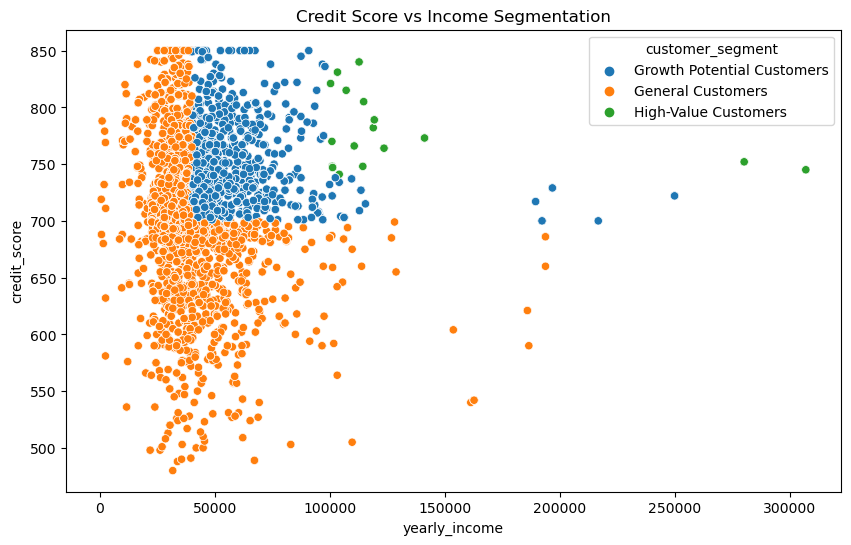

In [110]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['yearly_income'], y=df['credit_score'], hue=df['customer_segment'])
plt.title("Credit Score vs Income Segmentation")
plt.show()

### General Customers (4,107 customers):
* #### Need broad engagement strategies like loyalty programs and personalized recommendations.
* #### Awareness campaigns can keep them engaged.


### Growth Potential Customers (1,962 customers):
* #### Best suited for upselling and cross-selling efforts.
* #### Exclusive offers and financial products can increase their spending.

### High-Value Customers (60 customers):
* #### Require a personalized approach with VIP programs, premium services, and special perks.
* #### Ensuring their loyalty is crucial for long-term profitability.

### Number of Credit Cards

In [321]:
credit_card=df[df.card_type == 'Credit']
credit_card

,main_id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,...,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,age_segment,Income_Category,Credit_Score_Category
3,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278,...,2024-08-01,693,NO,1,12400,2003-01-01,2012,Late Career & Pre-Retirement,Mid-range_Income_Customer,Good credit score
5,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,37891,...,2003-09-01,736,YES,1,27500,2003-09-01,2012,Late Career & Pre-Retirement,Mid-range_Income_Customer,Fair credit score
15,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,163145,...,2015-05-01,877,YES,2,98100,2011-01-01,2011,Late Career & Pre-Retirement,High_Income_Customer,Fair credit score
20,68,42,70,1977,10,Male,58 Birch Lane,41.55,-90.60,20599,...,2021-09-01,74,YES,2,9900,2002-01-01,2019,Mid-Career Individuals,Low_Income_Customer,Fair credit score
22,68,42,70,1977,10,Male,58 Birch Lane,41.55,-90.60,20599,...,2022-11-01,922,YES,2,15800,2005-11-01,2011,Mid-Career Individuals,Low_Income_Customer,Fair credit score
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6138,1944,62,65,1957,11,Female,2 Elm Drive,38.95,-84.54,24218,...,2021-09-01,383,YES,1,11100,2002-01-01,2009,Late Career & Pre-Retirement,Low_Income_Customer,Good credit score
6141,185,47,67,1973,1,Female,276 Fifth Boulevard,40.66,-74.19,15175,...,2024-01-01,663,YES,1,6900,2000-11-01,2013,Mid-Career Individuals,Low_Income_Customer,Good credit score
6142,185,47,67,1973,1,Female,276 Fifth Boulevard,40.66,-74.19,15175,...,2021-01-01,492,YES,2,5700,2012-04-01,2012,Mid-Career Individuals,Low_Income_Customer,Good credit score
6143,1007,66,60,1954,2,Male,259 Valley Boulevard,40.24,-76.92,25336,...,2020-08-01,237,NO,2,9200,2012-02-01,2012,Retirees,Mid-range_Income_Customer,Fair credit score


In [317]:
# credit_card=credit_card[['main_id','card_type']]

In [323]:
card_pivot=credit_card.pivot_table(index=['client_id'], values='card_type', aggfunc='count')
card_pivot=card_pivot.rename(columns={'card_type': 'no_of_card'})

In [328]:
card_pivot[card_pivot['no_of_card'] >1].count()

no_of_card    535
dtype: int64

#### 535 customers have  more than 1 credit card